<img src="attachment:webscraping.png" width="200">

# Introduction to Web Scraping in Python

November 12, 2020 11-12:30 PM via Zoom

DS2F "Digital Scholarship & Data Science" Fellowship, University of Arizona Libraries

Instructor: Sabrina Nardin, Sociology Ph.D. Candidate, snardin@email.arizona.edu

## Getting Started

To participate in this workshop, you only need a computer and an internet connection. I suggest using a relatively up-do-date version of a browser like Chrome, Firefox, or Safari. If after the workshop you want to save this Jupyter notebook on your computer, go under File > Download as > and select your preferred format. You can also find a version of this workshop here: https://github.com/brinasab/web_scraping

In [ ]:
# print out a welcome message 
# to execute this code click "Run" at the top of the screen or press Ctrl+Enter

print("Welcome!")

Things to keep in mind:
* It might happen that you get disconnected from this vitual environment ("Connection failed" message). To reconnect, simply open again the link I provided in the Zoom chat. Once the environment is rebuilt, make sure to re-run the code you had before the disconnection.
* Please note that if, after the workshop, you load again this notebook using the link I provided, the changes you do on the code won't be saved on the virtual environment. You will have to download the notebook on your on laptop.

## Learning Objectives

By the end of this workshop you will be able to...
* Read an html page and evaluate it (by identifying and deciding which tags to use)
* Use the library “requests” to interact with websites
* Use the library “beautiful soup” to parse and get data from websites
* Understand some of the key tasks in static web scraping (missing data, errors, turn pages)
* Conceptualize web scraping as a process that goes from the website to the cleaned data

I will guide you step-by-step in learning these objectives! In the first part of the workshop, we will learn the most important commands of requests and beautiful soup. Then, we will apply these tools by scraping two real websites: University of Arizona website, and IMDb movie review website.

## What is Web Scraping?

* Web scraping is the process of gathering or "scraping" information from a website
* If you have ever copied and pasted information from the Internet, you have performed the same task of any web scraper, just on a small scale. Web scraping allows to automate this process to collect hundreds, thousands, or even millions of information
* It pertains to the data collection phase of a project, and usually targets structured data: for example companies' names, emails, phones, newspaper articles, reviews, prices, etc.
* There are mainly two ways to get data from a website (with Python, R, etc.): 1. Using the API provided by the website (Facebook, Twitter, YouTube, etc. all have their own APIs) 2. Directly accessing the HTML of the website: we focus on this in this workshop!

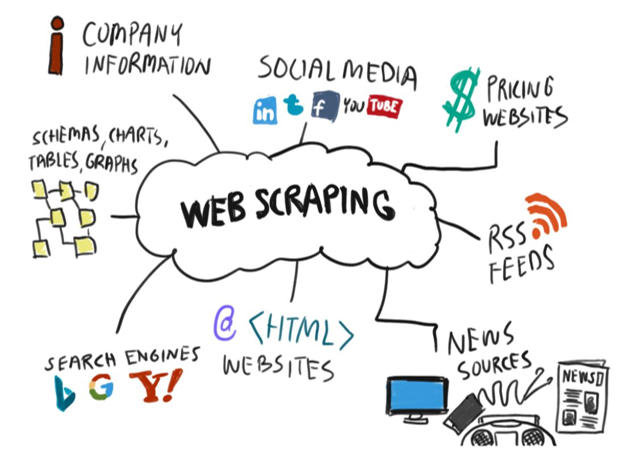

## Ethics of Scraping...

In [ ]:
ethical_scraper = "Just because I can, does not mean I should."
check_website_rules = "I swear on my honor that I will check the website rules before scraping it"

print(ethical_scraper, check_website_rules)

1. Private data (not OK!) VS. Public data (OK!):
   If there is a password or other barriers put in place by the host site, then it is likey private data. For example, is not OK to gather data from an online community when only logged-in users can access posts, unless you use the webiste API and you follow its rules


2. Check the “robots.txt” file before you scrape a website, by adding <code>/robots.txt</code> at the end of your url
    - Example NYT Robot File: https://www.nytimes.com/robots.txt (the star after the "User-agent" means "what I am going to tell you is valid for all robots" and after "Disallow" there is the list of things you are not allow to scrape)
    - Further info: https://www.robotstxt.org/robotstxt.html
    
                                                         
3. Read the website’s "Terms of Service" (ToS): these are the legal rules you agree to observe in order to use a service. Some people follow it, others do not. Violating ToS exposes to the risk of violating CFAA or “Computer Fraud & Abuse Act” which is a federal crime


4. If the website has an Application Programming Interface or API, use it
    - Example on how to use the NYT API to scrape news: https://martinheinz.dev/blog/31
    - Further info on news media APIs: https://en.wikipedia.org/wiki/List_of_news_media_APIs
                                                                   

5. Take a look at the "hiQ Labs v. LinkedIn" lawsuit case
https://www.abajournal.com/lawscribbler/article/scraping-a-public-website-isnt-a-crime


6. Some pratical things to keep in mind while you scrape to avoid being blocked:
    - be slow: webscraping consumes server resources from the website you are scraping, make sure to use a conservative rate when making requests to a server (e.g. 1 request every 10 seconds or so, or set a random number)
    - save and store the content of what you scrape, so to avoid scraping it again if you need it in the future
    - identify your scraper with a "user-agent" string that allows the website your are scraping to identify your client browser information. For example, you can add something like this in your code: 
    - <code>user = { "User-Agent" : "News extractor for research project, email: youremail@gmail.com" } 
    response = requests.get("put here the url you want to scrape", user)
    time.sleep(10)</code>

## Install packages

In [ ]:
# run this block of code to import the packages we need for the workshop 

# web scraping packages 
import requests                     # to interact with websites and get data from them 
from bs4 import BeautifulSoup       # to navigate and extract data from websites

# standard packages you might use for other projects as well
import time
import random
import re
import pandas as pd
import numpy as np

print("All packages available and imported!")

## Requests and Beautiful Soup

We first use "requests" to interact with an url (like the the one below), and we then use "beautiful soup" to parse the response we get back

In [ ]:
# let's "talk" with this arizona webpage:
# make a request and store (into a "response" variable) the data that the arizona server sends back to us 

response = requests.get("https://linguistics.arizona.edu/peo-faculty")
print(type(response))


In [ ]:
# you can specify your "User-Agent" as you send your request
# this is not very common but as good scrapers, we can make our intentions clear
# and provide a way to be contacted by the website (also to avoid getting blocked)

headers = { "User-Agent" : "web scraper for teaching purpose (snardin@email.arizona.edu)" } 

response = requests.get("https://linguistics.arizona.edu/peo-faculty", params = headers)


In [ ]:
# check our response status code: 200 means good, 4xx or 5xx mean errors



# in this case our request has been successful (i.e. the webpage has accepted it)
# if we get an error it means the webpage is not available: we can't "fix it", but we can skip that page

In [ ]:
# the request we send is in bytes: encoding translates bytes into "words" we can read
# here we check the default encoding (usuall utf-8), and leave it that way



# you can also change the encoding
#response.encoding = 'latin-1'

In [ ]:
# we got our response back from the arizona server, and we stored it into a "response" variable
# but to access it, we need to convert it into a text

response_txt = response.text
print(type(response_txt))

In [ ]:
# now we use BeautifulSoup to parse our response, using the html parser
# here we create a variable that I called "soup" (but we could call it also "whatever")

soup = BeautifulSoup(response_txt, "html.parser")
print(type(soup))

Notice that these steps are always executed in this sequence: find one (or more) website, send a request to it, save the response you get back, create a beautiful soup object to work with

In [ ]:
# use beautiful soup prettify() method to print the data nicely formatted as tree
# what we got here is the "skeleton" of our website

print(soup.prettify())

This "skeleton" is the html of our webpage, and we are going to learn how to navigate it.

Notice that we can access the same structure directly from the actual webpage: go to the website https://linguistics.arizona.edu/peo-faculty right click on it and select the "inspect" option. In Chrome or Firefox, there is a small box with an arrow icon. In Safari, there should be a button on the search bar which looks like a small target.

## Common Beautiful Soup methods:

In [ ]:
# get_text() extracts all text (remember "soup" is a variable we created in the previous step)



In [ ]:
# find() returns the FIRST instance of a tag (p, table, td, img, etc.)
# here we ask for the first paragraph <p> tag



In [ ]:
# extract the text from our paragraph <p> tag, using get_text()



# note that .text does the same thing, it is just a property calling the function get_text()
#print(soup.find('p').text) 

In [ ]:
# find_all() returns ALL instances of a tag on a given web page



In [ ]:
# find_all() by default gives us ALL tags of the kind we ask for
# but we can use it to get only the FIRST tag, or the SECOND tag, etc. we just need to change the number



In [ ]:
# to extract the text from each of these <p> tags at once, we need to a loop

paragraphs = soup.find_all('p')

for paragraph in paragraphs:
    print(paragraph.get_text(), "\n")
    

In [ ]:
# we can also save all <p> tags into a list

paragraphs_txt = []

for paragraph in paragraphs:
    paragraph_txt = paragraph.get_text()
    paragraphs_txt.append(paragraph_txt)
    
print(paragraphs_txt)

#paragraph_txt = paragraph_txt.replace('\xa0',' ')

In [ ]:
# use find_all() to ask for all instances of an EXACT MATCH
# here we find all instances of this specific tag: <td class="views-field views-field-realname">
# <td> means a cell of a table and the rest are details about this tag

print ( soup.find_all('td', {'class': "views-field views-field-realname"} ))


In [ ]:
# another syntax style that does the same thing

print(soup.find_all('td', class_="views-field views-field-realname")

## Example 1: extract all names, emails, phone numbers from one page

For this example, we use the same website we have been using so far: <code>https://linguistics.arizona.edu/peo-faculty</code> 
We use this as a "toy" example BUT it illustrates a common web scraping task: you can apply the same logic to collect contacts information from any website (e,g. from people from companies, members of congress, etc.)

For this webpage, we have already made a request with "requests" and parsed it with "beautiful soup." Our first task is to collect the names of the facult: we start by going on the webpage and check the tags that hold the names.

In [ ]:
# soup is the variable where we have previously saved the entire "skeletron" of this webpage
# to find the names, we need to examine what that is under <td class="views-field views-field-realname">

# this for loop enters into this "container" and prints everything that is in there
for row in soup.find_all('td',  attrs = {'class': 'views-field views-field-realname'}): 
    print(row.prettify())
    

In [ ]:
# get all names: 
# there is more than one <a> tag in this section, we want only the first one and we want the text




In [ ]:
# exercise: 
# can you collect all the emails? copy/past here the code above and modify it accordingly
# hint: emails are stored under the second 'a' tag




In [ ]:
# getting the phone numbers has two challenges: 
# phone sometimes is "NA" + the tag is <strong>TEL:</strong> but the phone is outside it
# (this is an example of bad html formatting...)




In [ ]:
# putting all of them togheter: collect names, emails, phones at once

contacts = []

for row in soup.find_all('td', {'class': 'views-field views-field-realname'}):
    
    # collect name
    name = row.find_all('a')[0].text
    
    # collect email
    email = row.find_all('a')[1].text
    
    # collect phone
    try:
        phone = row.find('strong', text='TEL:').next_sibling  
        phone = re.sub('^ *', '', phone)
    except:
        phone = "NA" 
    
    contacts.append([name, email, phone])  

# print results line by line and alphabetically
for row in sorted(contacts):
    print(row)
    

In [ ]:
# save results using pandas dataframe 

df = pd.DataFrame(contacts)

display (df) # same as print(df) but nicely formatted

In [ ]:
# rename df and columns

ling_faculty = df.rename (columns = {0: 'name', 1: 'email', 2: 'phone'})
display (ling_faculty[0:3])

In [ ]:
# export results with the "DataFrame.to_csv" function

ling_faculty.to_csv (r'C:\Users\Sabrina\Desktop\ling_faculty.csv', encoding='utf-8', index = False)
print('Data exported!')

For further practice: here is another Python example of extracting contact information with requests and beautiful soup for congress.gov https://medium.com/@lobodemonte/congress-gov-web-scraping-with-beautifulsoup-37af19f2e1f4
 

## Example 2 Part A: extract movie info from one page

For this second example, we use a more complex website and scrape movie reviews from IMDb. Let's check it:  https://www.imdb.com/search/title/?groups=top_1000&ref_=adv_prv (robots.txt page: https://www.imdb.com/robots.txt).

This second example is divided in two parts: (1) we reveiw what we have learned so far by colleting movie data from one single page; (2) we add some new stuff by collecting movie data from multiple pages. 

This example has been adapted from this tutorial https://medium.com/better-programming/how-to-scrape-multiple-pages-of-a-website-using-a-python-web-scraper-4e2c641cff8

##### STEP 1: make a request to the website with requests library

In [ ]:
# set up the url and headers
movie_url = "https://www.imdb.com/search/title/?groups=top_1000&ref_=adv_prv"
headers = { "User-Agent" : "web scraper for classroom purposes (snardin@email.arizona.edu)" } 

# make a request
results = requests.get(movie_url, headers = headers) 
print(type(results))


##### STEP 2: "soup" our results with bs library

In [ ]:
# store the skeletron of the webpage into a variable called "soup"
# remember to use .text to access the content

soup = BeautifulSoup(results.text, "html")

print(soup.prettify())

##### STEP 3: extract data from one page with bs library

* We want to extract the following 5 pieces of information: title, year, IMDb’s rating of the movie, genre, runtime
* There are a total of 50 movies for each page
* From inspecting the webpage, we notice that the data for each movie is displayed in the box under the following "div" tag (a "div" tag is a generic container and defines a section in an html page): <code> div class="lister-item-content" </code> which has this class attribute: <code> "lister-item-content" </code> We want to use this specific tag to set up our loop!
* Note that we could also take the above tag: <code> div class = "lister-item mode-advanced" </code> there is not a rule on this, but I prefer to take the smaller possible unit that still contains all info I want

In [ ]:
# this is the code to run to get the data
# the tags are different but the logic is the same as Example 1, so I ll let you explore the code!
# what is new here? if/else condition to deal with missing data


# initialize empty lists, one for each type of info we want

titles = []
years = []
genres = []
imdb_ratings = []
runtimes = []


# use find_all() method to loop over the specific tag in our "soup", and grab the data 

for element in soup.find_all('div', class_='lister-item-content'):
   
        # title is under <a> tag which is nested within <h3> tag
        title = element.h3.find('a').text
        titles.append(title)
        
        # year is under <span> tag which is nested within <h3> tag
        year = element.h3.find('span', class_='lister-item-year').text
        years.append(year)

        #IMDb rating is under <strong> tag which is the only one, so we can use a simpler notation
        imdb = element.strong.text
        imdb_ratings.append(imdb)
        
        # genre is under <span> tag which is nested within <p> tag
        # here we add a condition: if there is a genre grab it, otherwise put 'NA' 
        # tip: you should this for ever tag!
        genre = element.p.find('span', class_='genre').text \
                if element.p.find('span', class_='genre').text \
                else 'N/A'
        genres.append(genre)

        # runtime is under <span> tag which is nested within <p> tag
        runtime = element.find('span', class_='runtime').text if element.find('span', class_='runtime') else 'N/A'
        runtimes.append(runtime)
        
# print stuff
print("Data collected!")
#print(titles)
#print(years)
#print(imdb_ratings)
#print(genres)
#print(runtimes)

##### STEP 4: put data into a dataframe, clean, and export them 

In [ ]:
# create a pandas df and rename the columns

movies = pd.DataFrame({
'movie': titles,
'year': years,
'imdb': imdb_ratings,
'genre': genres,
'runtime': runtimes,
})

display(movies[0:10])

In [ ]:
# clean data: here I kept it short, but there is always data cleaning when you scrape

# remove \n (new line)
movies = movies.replace("\n","", regex=True)

# remove the parenthesis in the year column
movies['year'] = movies['year'].replace("\(", "", regex=True)
movies['year'] = movies['year'].replace("\)", "", regex=True)

# print
display(movies[0:10])


## Example 2 Part B: extract movie info from multiple pages

In this second and last part of this example, we learn how to get data for multiple pages iteratively, which is a quite common task in web scraping.
This adds some complexity in the preparation phase, but also in the "requests" phase (adding time and sleep as good practices, and dealing with http errors), and in the data extraction phase. 

##### STEP 1: generate a list of urls to scrape

The first step now becomes generating a list containing all the web pages we want to scrape

* Go to our url home page: https://www.imdb.com/search/title/?groups=top_1000&ref_=adv_prv
* Click on 'next page' to go to page 2: https://www.imdb.com/search/title/?groups=top_1000&start=51&ref_=adv_nxt
* Click on 'next page' to go to page 3: https://www.imdb.com/search/title/?groups=top_1000&start=101&ref_=adv_nxt
* Click on 'next page' to go to page 4: https://www.imdb.com/search/title/?groups=top_1000&start=151&ref_=adv_nxt

There are 50 movies on each page, thus: page 1 goes from 1-50, page 2 from 51-100, page 3 from 101-150 and so on. 

We use this information to generate a list of web pages to scrape. To do so, the trick is to generate a list of numbers that we will then plug into the address of each web page. Here we use the "np.arange" function with three arguments: start, stop, step <code>pages = np.arange(1, 1001, 50)</code> which says: start at 1, stop at 1001, take steps of size 50. This generates an array of numbers in steps of 50 (note that there are many other ways to do this, another common one is with the "range" function). 

Why 1001? We have 1000 movies to scrape, thus the last page will be at number 951, and will display movies from 951 to 1000. If we use 951 as stop number, Python would not include this page in our scraper, so we have to go one page further.

In [ ]:
# generate an array (using np) of page numbers and convert it to list

pages_numbers = np.arange(1, 1001, 50).tolist()

print(pages_numbers)
print(type(pages_numbers))    


In [ ]:
# for each website, generate its corresponding full address 

# initialize an empty list to store the urls we generate
full_pages = []

# loop over to generate the full list of websites 
for page_number in pages_numbers: 
    base_url = "https://www.imdb.com/search/title/?groups=top_1000&start="
    page = (base_url + str(page_number) + "&ref_=adv_nxt") 
    print(page)
    full_pages.append(page)
    

In [ ]:
# take only the first five websites for this workshop

for fp in full_pages[0:5]:
    print(fp)

##### STEP 2: make a request to each wepage with request library

In [ ]:
# this part shows how to generalize the code to go from one webpage to multiple webpages!

# set up an empty list to store all the requested pages that we will get
requested_pages = []

# take each page from the list of pages we have generated in the previous step ("full_pages") 
# and send a request to each of them

for full_page in full_pages[0:5]: 
    
    requested_page = requests.get(full_page) # send a request
    
    print(full_page)
    print("Status:", requested_page.status_code, " Encoding:", requested_page.encoding) 
    print(requested_page.raise_for_status(), "\n") # check if an error has occurred, "None" means no errors
    
    requested_page_txt = requested_page.text  # transform our response into a text
    
    time.sleep(random.randint(5, 10)) # space out our requests!
    
    requested_pages.append(requested_page_txt) 
    
print(requested_pages)

##### STEP 3: "soup" all our results with bs library

In [ ]:
# after having requested the html pages, use beautiful soup to parse them

souped_pages = [] 

for requested_page in requested_pages[0:5]:
    souped_page = BeautifulSoup(requested_page, 'html.parser') # no need of .text here bcs we have already done it above
    #print(souped_page)
    souped_pages.append(souped_page)
    
print("All pages souped!")


##### STEP 4: extract data from all pages with bs library

In [ ]:
# this is the same code from part A of this example!
# we just added an additional loop to make sure that it runs for all pages instead than for one

# set up empty lists to store resutls 
titles = []
years = []
genres = []
imdb_ratings = []
runtimes = []

# new loop to loop over all the souped pages (here only the first 5)
for souped_page in souped_pages[0:5]:
    
    # same loop as above to loop over each <div> tag for each page
    for element in soup.find_all('div', class_='lister-item-content'):

            # title is under <a> tag which is nested within <h3> tag
            title = element.h3.find('a').text
            titles.append(title)

            # year is under <span> tag which is nested within <h3> tag
            year = element.h3.find('span', class_='lister-item-year').text
            years.append(year)

            #IMDb rating is under <strong> tag which is the only one, so we can use a simpler notation
            imdb = element.strong.text
            imdb_ratings.append(imdb)

            # genre is under <span> tag which is nested within <p> tag
            # here we add a condition: if there is a genre grab it, otherwise put 'NA' (you should this for ever tag!)
            genre = element.p.find('span', class_='genre').text if element.p.find('span', class_='genre').text else 'N/A'
            genres.append(genre)

            # runtime is under <span> tag which is nested within <p> tag
            runtime = element.find('span', class_='runtime').text if element.find('span', class_='runtime') else 'N/A'
            runtimes.append(runtime)
            
print("Done collecting data!")

# print stuff
#print(titles)


##### STEP 5: put data into a dataframe, clean, and export them 

In [ ]:
# create a pandas df and rename the columns
movies = pd.DataFrame({
'movie': titles,
'year': years,
'imdb': imdb_ratings,
'genre': genres,
'runtime': runtimes,
})

# note that now we got 250 movies instead than 50, this is because we scraped 5 pages!
display(movies)

In [ ]:
# clean data

# remove \n (new line)
movies = movies.replace("\n","", regex=True)

# remove the parenthesis in the year column
movies['year'] = movies['year'].replace("\(", "", regex=True)
movies['year'] = movies['year'].replace("\)", "", regex=True)

# print
display(movies[0:10])


In [ ]:
# export data

movies.to_csv (r'C:\Users\Sabrina\Desktop\movies.csv', encoding='utf-8', index = False)

print("Data saved in the given directory: well done!")

## Common Web Scraping Challanges (and Solutions)

* <b>Variety</b>: every website is different, even if there are general recurrent structures, pretty much every website requires a new project; also, and unfortunately, not every website has been built with a logical formatting, which makes it more challenging to scrape
* <b>Change</b>: the same website might change over time, you might find that the script that you developed a few months ago does not work anymore, but the good news is that usually with a few changes it will run again!
* <b>Limits</b>: some websites set a max amount of data you can scrape at once, for example 50 pages or 2500 articles max, and the solution is to break your requests into "chuncks"
* <b>Messy</b>: the scraped data are usually a bit messy and they need to be cleaned
* <b>Dynamic Scraping</b>: this not really a challange but something to keep in mind: many websites incorporate javascript dynamic parts and Beautiful Soup is not that good for dynamic scraping, but Scrapy and/or Selenium can help

## To sum things up

In this workshop you learned how to...

* inspect the htlm structure of a website with your brownser's developer tools
* read and understand the html language to select the tags to extract the data 
* use the library Request to make a request to the server and get the page
* use the library Beautiful Soup to parse the downloaded html page and to extract the information
* turn pages, account for missing data, handle requests errors
* put the collected data into a pandas dataframe, clean them, and export them

## Additional information

Here is some additional information on the topics we covered during the workshop

#### Requests and Beautiful Soup

Use <b>Requests</b> to interact with web pages and get data from them. It sends HTTP requests to web servers and allows us (humans) to access the response.

Use <b>Beautiful Soup (bs4)</b> to parse the data. It allows us to navigate and extract data from the html and other markup languages. Basically, it helps navigating the html tree by parsing it and to extract the desired tags. Install  Bs4 documentation: https://www.crummy.com/software/BeautifulSoup/bs4/doc/

* Install Requests: https://requests.readthedocs.io/en/master/
* Install Beautiful Soup: https://www.crummy.com/software/BeautifulSoup/

#### Encoding 

Encoding (i.e. transforming bytes into characters we can read), is an important thing in webscraping. Remember that when the library "requests" gets the data, it encodes them for you, by making an educated guess. The most common encoding is "UTF-8" which is the default and it is good for English and most languages, but not all. You can always change the encoding, for example to change the default encoding "utf-8" to "latin-1" type 
<code> .encoding = 'latin-1' </code>

#### Making requests to web servers

* Computers talk to each other by making and receiving <b>data requests</b>: when you click on a page, your web browser makes a request (what we did above with the "requests.get") to the web server of that page and gets back a response object. For example, if you type https://sociology.arizona.edu/news into your <b>web browser</b>, you are telling the arizona <b>web server</b> that you would like to visualize the information stored at /news. The arizona web server receives your request and sends back to your web browser a reponse, i.e. a bunch of files that your browser transforms into a nice visual display that might include texts, graphics, hyperlinks, etc.


* A <b>User-Agent</b> is a text string that you web browser sends evey time you make a requests to a website, and communicates info about your device type, operating system, and browser. This info is useful for the server as it prepares its response accordingly. For us, this is important because you can have your scraper being blocked and many websites do not let you view the content if the User-Agent is not set. To know what is your User-Agent, type "what is my user agent" in the Google search bar. This is how a Chrome User-Agent on Windows looks like:

    <code>user_agent = "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/86.0.4240.183 Safari/537.36"</code>
    
    
* Nice website for additional information: https://towardsdatascience.com/ethics-in-web-scraping-b96b18136f01


#### What is this mess? It is the HTML "skeleton" of our Webpage!

The html language is quite complex and messy. To navigate it, the first thing to do is to go back to the webpage and inspect it using your web browser development tools, so you can see the same skeletron from it. 

Go to the website (such as https://linguistics.arizona.edu/peo-faculty) right click on it, and select the "inspect" option. If you do it using Chrome as web browser, you will find a small box with an arrow icon. Use the arrow to help you navigating and selecting the tags. In Safari there should be a button on the search bar, which looks like a small target.

Usually a website is made of the following:

* <b>HTML</b> the core element of a website, basically one or more text files written in HTML or Hypertext Markup Language, which is not a programming language, like Python, but is a so-called "markup language" it uses a set of rules or tags to  organanize the webpage (i.e. makes the text bold, creates body text, paragraphs, inserts hyperlinks, etc.), but when the page is displayed the markup language is hidden
* <b>CSS</b> which means Cascading Style Sheets, basically it adds styling to make the page looks nicer 
* <b>JS</b> Javascript code is used to add interactivity to the page (and you need "dynamic webscraping" to interact with it)
* <b>Images</b> for example jpg and png allow webpages to show pictures, other common stuff are videos or multimedia

#### Tags
In web scraping, tags are fundamental as we collect information from webpages using them. Some webpages use "direct formatting", others use "logical formatting" which is easier to scrape. Not all webpages are "made well", so you have to get creative to scrape data from them. 
* tags follow a tree-like structure and are nested 
* tags go in pairs: one on each end of the content that they include, the first is the start tag, the second is the end tag 
* list of tags: https://developer.mozilla.org/en-US/docs/Web/HTML/Element

Tags have commonly used names that depend on their positions in relations to other tags:
* child: the tag inside another tag (e.g. the p tag is usually a child of the body tag)
* parent: the tag that contains another tag (e.g. the html tag is the parent of the body tag)
* sibling: two tags are siblings if they are nested inside the same parent

#### Class and id attributes
In web scraping, class and id attributes are important because we can extract elements using them. Since they offer quite detailed information, they help to find the specific element we want to scrape.
* class and id are special attributes that specify more information about a given html tag, usually a certain style
* are optional in that not all tags have them, but they can be used to all of them
* the same class can be shared between elements but each element can only have one id

## Credits

What is webscraping:
* webscraping image: https://blog.apify.com/what-is-web-scraping-1b548f8d6ac1

Requests and Beautiful Soup:
* Real python tutorial: https://realpython.com/beautiful-soup-web-scraper-python/
* Web scraping python and bs tutorial: https://www.dataquest.io/blog/web-scraping-tutorial-python/
* Beginner's guide to web scraping tutorial: https://opensource.com/article/20/5/web-scraping-python

HTML language:
* Mike Hammond's lectures LING 508 Computational Linguistic Fall 2019 
* https://www.dataquest.io/blog/web-scraping-tutorial-python/
* https://en.wikipedia.org/wiki/Web_page#:~:text=The%20core%20element%20of%20a,CSS)%20code%20for%20presentation%20semantics.
* html tree structure image: https://www.researchgate.net/figure/HTML-source-code-represented-as-tree-structure_fig10_266611108
* html table with tags image: https://mason.gmu.edu/~kshiffl4/375/module5-2.html

More on tags and CSS selectors (cheet sheets for webscraping tasks): 
* https://developer.mozilla.org/en-US/docs/Web/HTML/Element
* https://www.w3schools.com/html/html_elements.asp
* https://www.w3schools.com/css/default.asp

Examples:
* https://linguistics.arizona.edu/peo-faculty
* https://www.imdb.com/search/title/?groups=top_1000&ref_=adv_prv
* https://medium.com/better-programming/how-to-scrape-multiple-pages-of-a-website-using-a-python-web-scraper-4e2c641cff8